## Generalization

Model Generalization - Performance of model on unseen ***test*** data. 

For any supervised learning problem, our task is to learn a model/hypothesis parameterized by $\theta$, $h_{\theta}$ using the training examples $\{(x^{(i)}, y^{(i)})\}_{i = 1}^n$. We do so by minimizing some cost/loss function $J_{\theta}$. For e.g. in the case of OLS regression - 
$$
J(\theta) = \frac{1}{n}\Sigma_{i=1}^n(y^{(i)} - h_{\theta}(x^{(i)}))^2
$$
The above expression is called the training loss. But it is also important to measure the performance on test (unseen) samples as well to see how well our model generalizes. This is called the **test loss**. $\forall$ unseen data $(x,y) \sim D$, for OLS regression, test loss is the expected value of the squared loss over the samples $(x,y)$ coming from the distribution $D$, i.e. - 
$$
L(\theta) = E_{(x,y) \sim D}[(y - h_{\theta}(x))^2]
$$
As the training procedure has not used the test data, the loss values are not necessarily similar and its known as the generalization gap.

#### Overfitting - 
When the train loss is small but the test loss is higher. Model doesn't generalize well.
#### Underfitting - 
When the train loss itself is very large. Model isn't fitted well by training examples.

Let's see how the test error is influenced by the learning procedure and model parameterization.

### Bias-variance tradeoff

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

np.random.seed(0)

In [106]:
def function(x):
    return 2*x**2 + 2*x - 1

MIN_X = -1
MAX_X = 1
NUM_SAMPLES = 10

underlying_function = np.vectorize(function)
X = np.linspace(MIN_X, MAX_X, 1000)
h = underlying_function(X)

def generate_data(n_samples=100):
    X = np.random.uniform(MIN_X, MAX_X, size=(n_samples, 1))
    h = underlying_function(X)
    y = h + np.random.normal(loc=0, scale=1, size=(n_samples, 1))
    return X, y

def plot_data(X, y):
    plt.scatter(X, y, marker = 'x', color = 'r', label = 'data')
    plt.plot(np.linspace(MIN_X, MAX_X, 1000), h, color = 'b', label = 'underlying function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

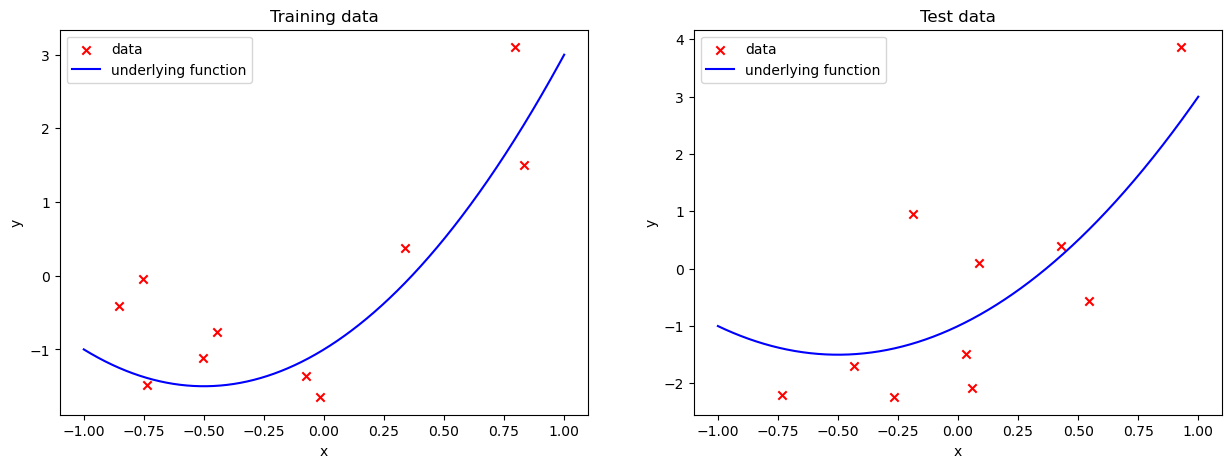

In [110]:
train_x, train_y = generate_data(NUM_SAMPLES)
test_x, test_y = generate_data(NUM_SAMPLES)

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].scatter(train_x, train_y, marker = 'x', color = 'r', label = 'data')
ax[0].plot(np.linspace(MIN_X, MAX_X, 1000), h, color = 'b', label = 'underlying function')
ax[0].set_title('Training data')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend()

ax[1].scatter(test_x, test_y, marker = 'x', color = 'r', label = 'data')
ax[1].plot(np.linspace(MIN_X, MAX_X, 1000), h, color = 'b', label = 'underlying function')
ax[1].set_title('Test data')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].legend()

plt.show()

We have the training and the test data coming from the same underlying distribution. <br>
$h^{*}(x) = 2x^2 + 2x - 1$ is the underlying quadratic function. <br>
$y^{(i)} = h^{*}(x^{(i)}) + \xi^{(i)}$ is the generated data after adding the random noise $\xi \sim N(0, 1)$

Our goal is to predict the underlying function $h^{*}(.)$

Let us assume that the relationship between the $x$ and $y$ is linear. So we fit a linear line on the training data.

Linear regression model: y = 0.06076 + 1.71936x


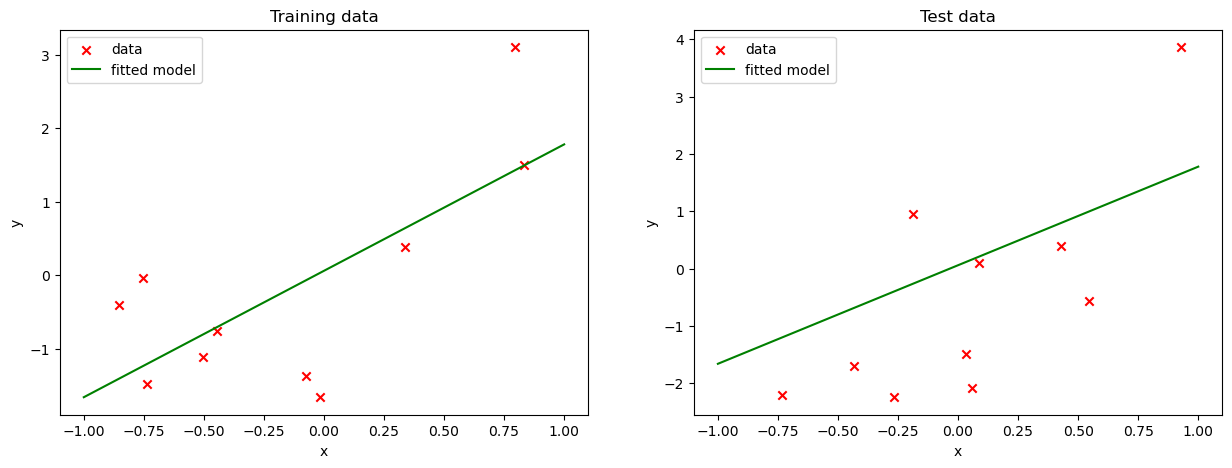

In [120]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_x, train_y)
print('Linear regression model: y = {:.5f} + {:.5f}x'.format(model.intercept_[0], model.coef_[0][0]))

# plot the fitted model
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].scatter(train_x, train_y, marker = 'x', color = 'r', label = 'data')
ax[0].plot(np.linspace(MIN_X, MAX_X, 1000), model.predict(np.linspace(MIN_X, MAX_X, 1000).reshape(-1, 1)), color = 'g', label = 'fitted model')

ax[0].set_title('Training data')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend()

ax[1].scatter(test_x, test_y, marker = 'x', color = 'r', label = 'data')
ax[1].plot(np.linspace(MIN_X, MAX_X, 1000), model.predict(np.linspace(MIN_X, MAX_X, 1000).reshape(-1, 1)), color = 'g', label = 'fitted model')

ax[1].set_title('Test data')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].legend()

plt.show()

In [114]:
# claculate the mean squared error for the training and test data
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(train_y, model.predict(train_x))
test_mse = mean_squared_error(test_y, model.predict(test_x))

print('Training MSE: {:.5f}'.format(train_mse))
print('Test MSE: {:.5f}'.format(test_mse))

Training MSE: 0.99738
Test MSE: 2.20885


As we know that the true relationship between the variables is not linear, we can see the our hypothesis is not even fitting the training set well. As a result training error is large, the model suffers from huge **bias**, this is an example of ***underfitting***.

The issue cannot be mitigated with more training data, as the linear function would still not be able to capture the true relationship $h*$, which is quadratic in nature.

We can now try to solve the underfitting with more complex model. We can fit a 5th degree polynomial on our training data and see if it generalizes on the test data.

Polynomial regression model: y = -1.62736 + 0.16404x + 14.31870x^2 + 20.28281x^3 + -15.94868x^4 + -26.88841x^5


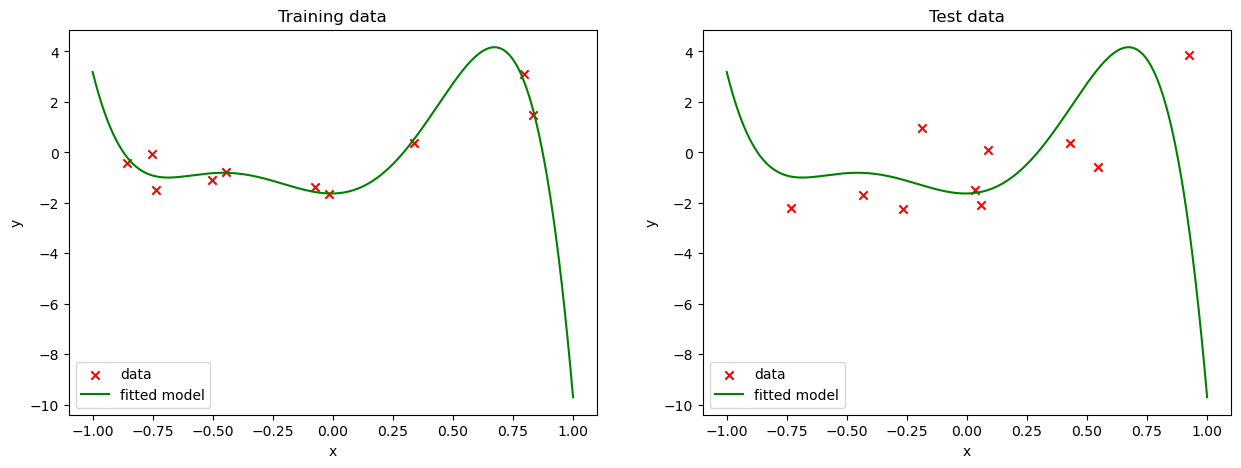

In [121]:
# fit a polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5)
train_x_poly = poly.fit_transform(train_x)

model = LinearRegression()
model.fit(train_x_poly, train_y)

print('Polynomial regression model: y = {:.5f} + {:.5f}x + {:.5f}x^2 + {:.5f}x^3 + {:.5f}x^4 + {:.5f}x^5'.format(model.intercept_[0], model.coef_[0][1], model.coef_[0][2], model.coef_[0][3], model.coef_[0][4], model.coef_[0][5]))

# plot the fitted model
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].scatter(train_x, train_y, marker = 'x', color = 'r', label = 'data')
ax[0].plot(np.linspace(MIN_X, MAX_X, 1000), model.predict(poly.transform(np.linspace(MIN_X, MAX_X, 1000).reshape(-1, 1))), color = 'g', label = 'fitted model')

ax[0].set_title('Training data')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend()

ax[1].scatter(test_x, test_y, marker = 'x', color = 'r', label = 'data')
ax[1].plot(np.linspace(MIN_X, MAX_X, 1000), model.predict(poly.transform(np.linspace(MIN_X, MAX_X, 1000).reshape(-1, 1))), color = 'g', label = 'fitted model')

ax[1].set_title('Test data')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].legend()

plt.show()

In [116]:
# claculate the mean squared error for the training and test data
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(train_y, model.predict(poly.transform(train_x)))
test_mse = mean_squared_error(test_y, model.predict(poly.transform(test_x)))

print('Training MSE: {:.5f}'.format(train_mse))
print('Test MSE: {:.5f}'.format(test_mse))

Training MSE: 0.13556
Test MSE: 7.76610


As we can see that the training error has drastically reduced with the 5th degree model, but the model is still not performing well on the test data.

**But can we mitigate the issue with more training data?**

Polynomial regression model: y = -0.96743 + 2.03471x + 1.77746x^2 + 0.13818x^3 + 0.25672x^4 + -0.19866x^5


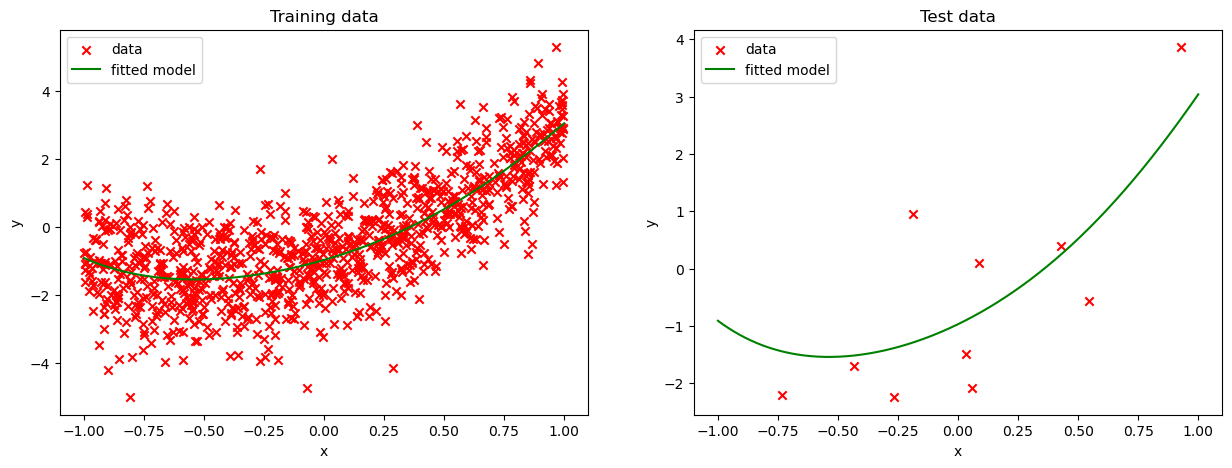

In [126]:
# fit a polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5)
NUM_SAMPLES_TRAIN = 1000

train_x_bigger_sample, train_y_bigger_sample = generate_data(NUM_SAMPLES_TRAIN)

train_x_poly = poly.fit_transform(train_x_bigger_sample)

model = LinearRegression()
model.fit(train_x_poly, train_y_bigger_sample)

print('Polynomial regression model: y = {:.5f} + {:.5f}x + {:.5f}x^2 + {:.5f}x^3 + {:.5f}x^4 + {:.5f}x^5'.format(model.intercept_[0], model.coef_[0][1], model.coef_[0][2], model.coef_[0][3], model.coef_[0][4], model.coef_[0][5]))

# plot the fitted model
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].scatter(train_x_bigger_sample, train_y_bigger_sample, marker = 'x', color = 'r', label = 'data')
ax[0].plot(np.linspace(MIN_X, MAX_X, 1000), model.predict(poly.transform(np.linspace(MIN_X, MAX_X, 1000).reshape(-1, 1))), color = 'g', label = 'fitted model')

ax[0].set_title('Training data')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend()

ax[1].scatter(test_x, test_y, marker = 'x', color = 'r', label = 'data')
ax[1].plot(np.linspace(MIN_X, MAX_X, 1000), model.predict(poly.transform(np.linspace(MIN_X, MAX_X, 1000).reshape(-1, 1))), color = 'g', label = 'fitted model')

ax[1].set_title('Test data')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].legend()

plt.show()



In [127]:
# claculate the mean squared error for the training and test data
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(train_y_bigger_sample, model.predict(poly.transform(train_x_bigger_sample)))
test_mse = mean_squared_error(test_y, model.predict(poly.transform(test_x)))

print('Training MSE: {:.5f}'.format(train_mse))
print('Test MSE: {:.5f}'.format(test_mse))

Training MSE: 1.05967
Test MSE: 1.23192


We can see that we have reduced the error on our test data, by introducing more data points. The resulting model in this case is close to quadratic form as $\theta_2, \theta_3, \theta_4 \ and \ \theta_5$ are close to 0.


Which leeds to a conclusion culprit is the **variance**, i.e. lack of data and not the **bias**.<br>
In other words, there's a large risk of fitting patterns of the data that is present in our small dataset, mainly due to the spurious nature of the observation noise $\xi$. In this case the model has very high variance.

We can see how the fitted models vary with different sets of training samples which suggests the presence of high variance.

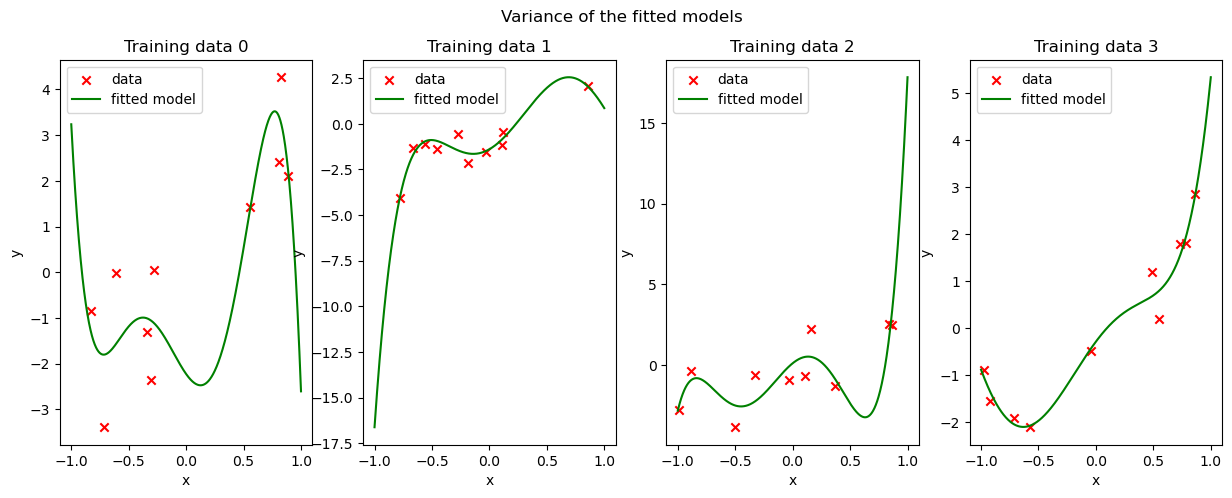

In [139]:
# fit a polynomial regression model on 4 sets of data

NUM_SAMPLES_TRAIN = 10

train_x_sample = []
train_y_sample = []

for i in range(4):
    sample_x, sample_y = generate_data(NUM_SAMPLES_TRAIN)
    train_x_sample.append(sample_x)
    train_y_sample.append(sample_y)

# fit a polynomial regression model on each set of data 
models = []
for i in range(4):
    poly = PolynomialFeatures(degree = 5)
    train_x_poly = poly.fit_transform(train_x_sample[i])
    model = LinearRegression()
    model.fit(train_x_poly, train_y_sample[i])
    models.append(model)

# plot the fitted model
fig, ax = plt.subplots(1, 4, figsize = (15, 5))
for i in range(4):
    ax[i].scatter(train_x_sample[i], train_y_sample[i], marker = 'x', color = 'r', label = 'data')
    ax[i].plot(np.linspace(MIN_X, MAX_X, 1000), models[i].predict(poly.transform(np.linspace(MIN_X, MAX_X, 1000).reshape(-1, 1))), color = 'g', label = 'fitted model')

    ax[i].set_title('Training data {}'.format(i))
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].legend()

# # set same ylim for all subplots
# ymin, ymax = ax[0].get_ylim()
# for i in range(1, 4):
#     ymin_temp, ymax_temp = ax[i].get_ylim()
#     ymin = min(ymin, ymin_temp)
#     ymax = max(ymax, ymax_temp)

# for i in range(4):
#     ax[i].set_ylim(ymin, ymax)
plt.suptitle('Variance of the fitted models')
plt.show()


Variance (intuitive definition) - Amount of variation across the models learnt on multiple different training datasets. Our fitted models show high variance when they fit to the "spurious patterns" of the multiple datasets.

The model is either "tpp simple" and has very few parameters, then it may have large bias and typically suffers from under fitting, or, the model is "too complex", has many parameters, then is suffers from the large variance and overfits the data. ***This is called the bias variance trade-off***

**The principle of bias-variance tradeoff is perhaps the first resort when analyzing and predicting the behavior of test errors.**

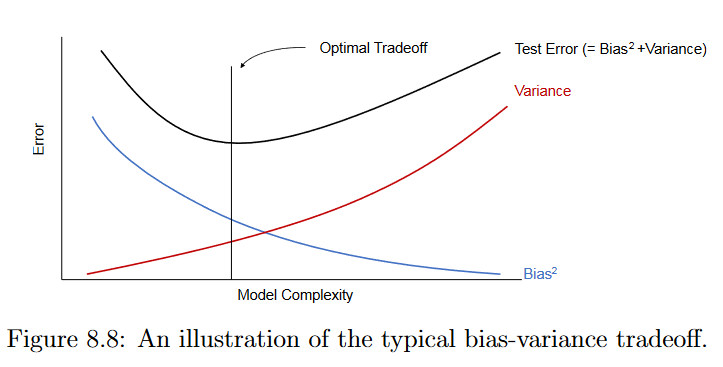

### Mathematical decomposition of bias and variance
- $S = \{x^{(i)}, y^{(i)}\}$ - The training data set
- $y^{(i)} = h^{*}(x^{(i)}) + \xi^{(i)}$
    - $h^{*}$ - actual underlying generating function 
    - $\xi \sim N(0, \sigma^2)$ - random noise in the generation process
- $\hat{h}_{S}$ - learned function using the dataset $S$

The MSE is given by - 
$$\begin{align*}
MSE(x) &= E_{S, \xi}[(y - \hat{h}_{S})^2] \\
&= E[(\xi + (h^{*}(x) - \hat{h}_{S}(x)))^2] \\
&= E[\xi^2] + E[(h^{*}(x) - \hat{h}_{S}(x))^2] \\
&= \sigma^2 + E[(h^{*}(x) - \hat{h}_{S}(x))^2]
\end{align*}
$$

Let us define a model obtained by averaging out the prediction of infinite models trained on different samples of training datasets.
$$
h_{ave}(x) = E_{S}[h_{S}(x)]
$$

Let us define the error term - $c$ - which is the difference between the actual and the average hypothesis. $\therefore$
$$\begin{align*}
MSE(x) &= \sigma^2 + (h^{*}(x) - h_{avg}(x))^2 + E[(h_{avg}(x) - \hat{h}_{S}(x))^2] \\
&=  \sigma^2 + (h^{*}(x) - h_{avg}(x))^2 + var(h_{S}(x))
\end{align*}
$$

| Bias | Variance | 
| :----: | :------: |
|$h^{*}(x) - h_{avg}(x)$ | $E[(h_{avg}(x) - \hat{h}_{S}(x))^2]$ | 
| Captures the part of error that are introduced by lack of expressivity of the learned model | Captures how the random nature of the finite dataset introduces variance in the learned model |
|Caused due to family of models, $\hat{h}_{S}$, not being able to approximate the $h^{*}$| Caused due to sensitivity of learned model to the randomness of the data|
|Can be mitigated by learning more complex models| Can be mitigated by introducing more training data|

## Double Descent Phenomenon

### Model-Wise Double Descent 
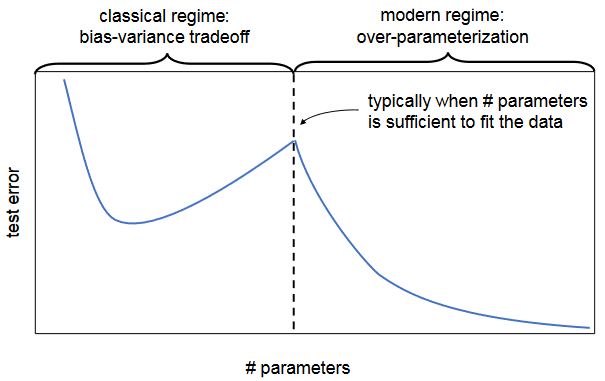

In many cases we see that the test error has a second descent (contrary to the classical regime of generalization). The test error first decreases (reduce bias), then increases (increase variance) to a peak when model size is large enough to fit all the training data well, then decreases again in the so called over-parameterization scheme when the number of data points < the number parameters in the model.

### Sample-Wise Double Descent 
Similar to model-wise double descent, the observed test error is not monotonically decreasing as we increase the size of the training data. The error first decreases (reduce variance), then increases (increase bias), peaks around the point when the number of parameters are almost equal to the number of training samples, then decreases again


In both model-wise and sample-wise double descent phenomenon, the test error peaks at $n \approx d$ and then goes on to decrease.

### Explanation for double descent
Commonly used optimizers such as gradient descent provides an implicit regularization effect. (???)

## Sample Complexity Bounds
- Formalize the bias variance tradeoff
- Automatically decide what order polynomial to fit on the training set
- Relate error on the training set to generalization 
- Conditions under which we can actually prove that the learning algorithm will work well.

#### Lemma 1 : Union Bound
Let $A_1, A_2, ... , A_k$ be $k$ different events. Then - 
$$
P(A_1 \cup A_2 \cup ... \cup A_k) \leq P(A_1) + P(A_2) + ... + P(A_k)
$$

#### Lemma 2 : Hoeffding Inequality 
- $Z_1, Z_2, ..., Z_n$ be $n$ independently and identically distributed random variables from a Bernoulli($\phi$).
- $\hat{\phi} = \frac{1}{n}\Sigma_{i=1}^{n}Z_i$ i.e the mean of the random variables.
- $\gamma > 0$ be fixed, then - 
$$
P(|\phi - \hat{\phi}| \geq \gamma) \leq 2exp(-2\gamma^2n)
$$
i.e. if $\hat{\phi}$ is the estimate of true value $\phi$ then the probability of us being far from the true value if less if the number of samples $n$ is large enough.

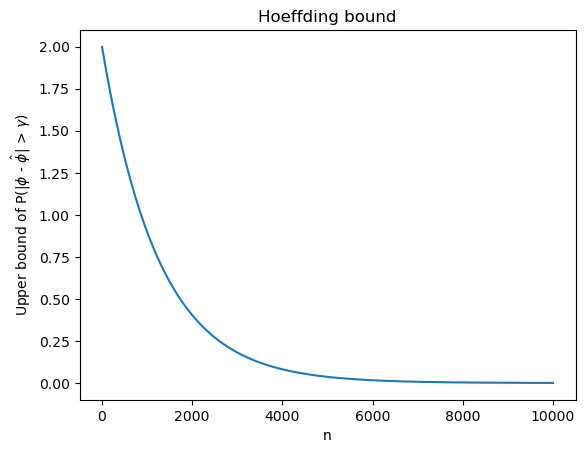

In [21]:
gamma = 0.02
n = np.arange(1, 10000)
p = 2*np.exp(-2*(gamma**2)*n)
plt.plot(n, p)
plt.title('Hoeffding bound')
plt.xlabel('n')
plt.ylabel('Upper bound of P(|$\phi$ - $\hat{\phi}$| > $\gamma)$')
plt.show()

Let us consider the case of binary classification i.e. $y^{(i)} \in \{0,1\}$
- Training Set $S = {(x^{(i)}, y^{(i)});i=1,...,n}$ with $n = |S|$
- $(x^{(i)}, y^{(i)}) \sim D$
- Learned hypothesis - $h$
- The training error/ empirical error/ empirical risk is given by - 
$$
\hat{\epsilon}(h) = \frac{1}{n}\Sigma_{i=1}^{n}1\{h(x^{(i)}) \neq y^{(i)}\}
$$
- The generalization error is given by - 
$$
\epsilon(h) = P_{(x,y)\sim D}(h(x)\neq y)
$$
i.e the probability that if we draw a new example from $D$, the hypothesis $h$ will misclassify it.

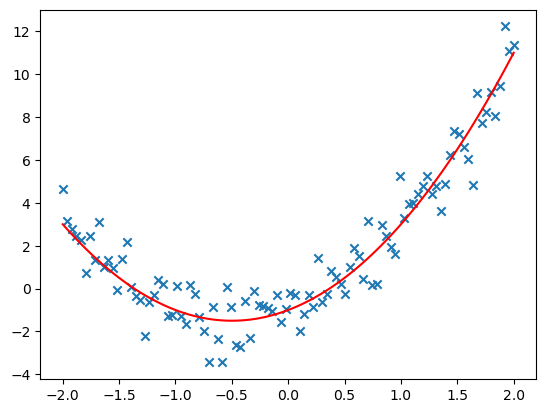

In [76]:
x = np.linspace(-2, 2, 100)
h = function(x)
eps = np.random.normal(0, 1, 100)
y = h + eps
plt.scatter(x, y, marker='x', label='data')
plt.plot(x, h, color='r', label='underlying function')

y.shape =(10,) x.shape =(10,) eps.shape =(10,) h.shape =(10,)


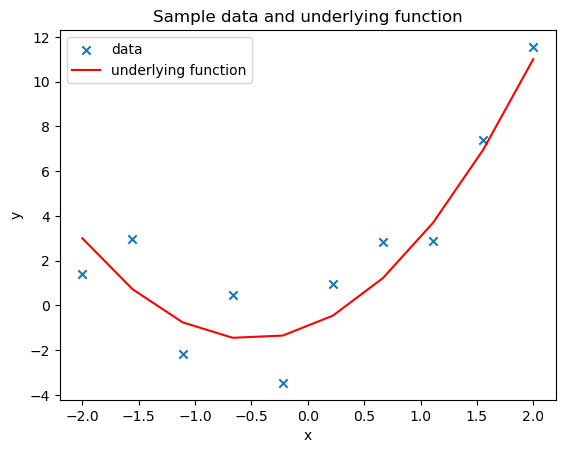

In [77]:
x = np.linspace(-2, 2 , 10)
h = function(x)
eps = np.random.normal(0, 1, 10)
y = h + eps

print(f'{y.shape =} {x.shape =} {eps.shape =} {h.shape =}')

plt.scatter(x, y, marker='x', label='data')
plt.plot(x, h, color='r', label='underlying function')
plt.legend()
plt.title('Sample data and underlying function')
plt.ylabel('y')
plt.xlabel('x')
plt.show()


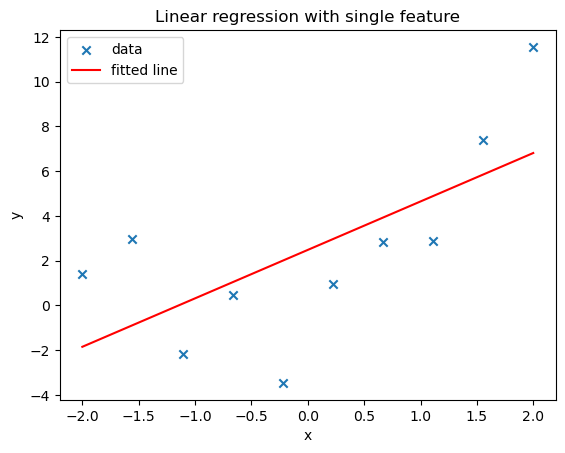

In [78]:
# fit a line to the data, using sklearn
# underfit
from sklearn.linear_model import LinearRegression

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

# plot the line 
plt.scatter(x, y, marker='x', label='data')
h = function(x)
plt.plot(x, model.predict(x.reshape(-1, 1)), color='r', label='fitted line')
plt.title('Linear regression with single feature')
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()

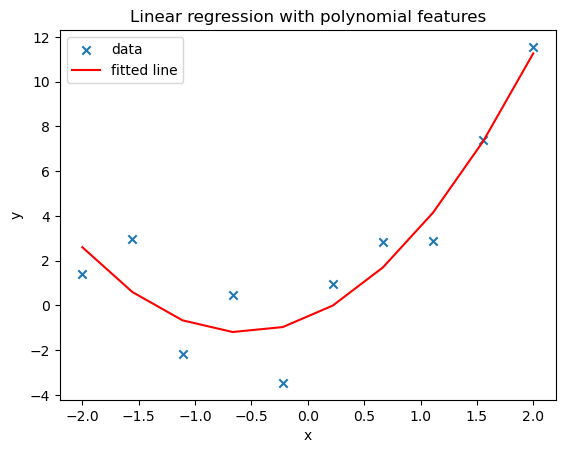

In [79]:
# linear regression with polynomial features
x_2 = x**2
x_poly = np.concatenate((x, x_2), axis=1)
model = LinearRegression()
model.fit(x_poly, y)

# plot the line
plt.scatter(x, y, marker='x', label='data')
h = function(x)
plt.plot(x, model.predict(x_poly), color='r', label='fitted line')
plt.title('Linear regression with polynomial features')
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()


![](https://i.imgflip.com/yp6kp.jpg?a472560)

In [80]:
# print the coefficients
print(f'{model.coef_ =}')
print(f'{model.intercept_ =}')

model.coef_ =array([[2.1639386 , 1.87702555]])
model.intercept_ =array([-0.57813192])


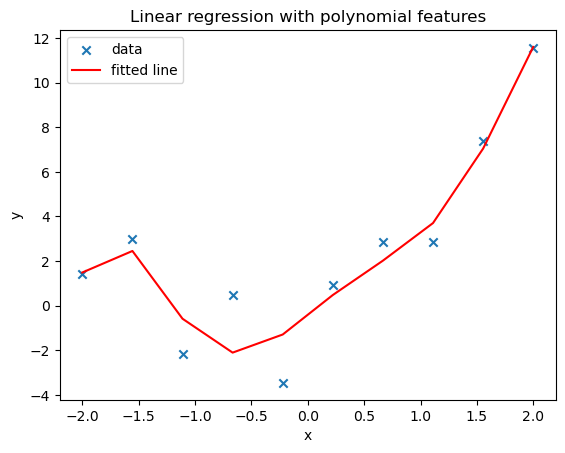

In [81]:
# overfit, fit a polynomial of degree 7
x_2 = x**2
x_3 = x**3
x_4 = x**4
x_5 = x**5
x_6 = x**6
x_7 = x**7
x_poly = np.concatenate((x, x_2, x_3, x_4, x_5, x_6, x_7), axis=1)
model = LinearRegression()
model.fit(x_poly, y)

# plot the line
plt.scatter(x, y, marker='x', label='data')
h = function(x)
plt.plot(x, model.predict(x_poly), color='r', label='fitted line')
plt.title('Linear regression with polynomial features')
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()

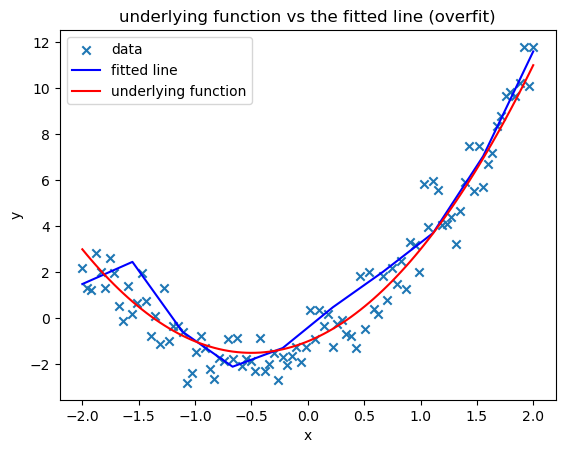

In [82]:
# show that it overfits 
x = np.linspace(-2, 2, 100)
h = function(x)
eps = np.random.normal(0, 1, 100)
y = h + eps
plt.scatter(x, y, marker='x', label='data')
plt.plot(x_poly[:,0], model.predict(x_poly), color='b', label='fitted line')
plt.plot(x, h, color='r', label='underlying function')
plt.legend()
plt.title('underlying function vs the fitted line (overfit)')
plt.ylabel('y')
plt.xlabel('x')
plt.show()
